# Laboratorio # Prueba Dataset
## Kimberly Alejandra Rivera Gonzalez
## 20001676

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import joblib

### 1. Cargamos Dataset

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [4]:
data.shape

(2240, 29)

In [5]:
data['dia'], data['mes'], data['Year'] = data['Dt_Customer'].str.split('-', 2).str

<ipython-input-5-404d63822298>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['dia'], data['mes'], data['Year'] = data['Dt_Customer'].str.split('-', 2).str


In [6]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dia,mes,Year
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,04,09,2012
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,08,03,2014
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,21,08,2013
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,10,02,2014
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,19,01,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,13,06,2013
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,10,06,2014
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,25,01,2014
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,24,01,2014


In [7]:
data["dia"] = pd.to_numeric(data["dia"])

In [8]:
data["mes"] = pd.to_numeric(data["mes"])

In [9]:
data["Year"] = pd.to_numeric(data["Year"])

In [10]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dia                      int64
mes                      int64
Year                     int64
dtype: o

In [11]:
del(data['Dt_Customer'])

### 2. Análisis de Datos para toma de decisiones en FE Pipeline

##### 2.1 Análisis del Taget

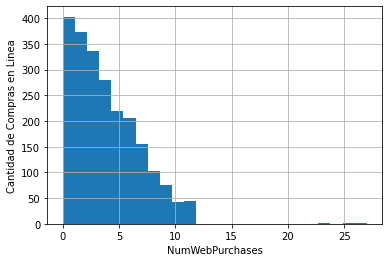

In [12]:
data['NumWebPurchases'].hist(bins=25, density=False)
plt.xlabel("NumWebPurchases")
plt.ylabel("Cantidad de Compras en Linea")
plt.show()

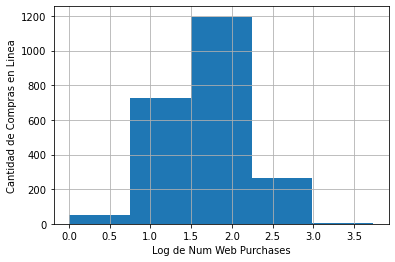

In [13]:
#transformación de target con Pow a la 0.4.
np.power(data['NumWebPurchases'],0.4).hist(bins=5, density=False)
plt.xlabel("Log de Num Web Purchases")
plt.ylabel("Cantidad de Compras en Linea")
plt.show()

#### 2.2 Verificamos tipos de variables en X

In [14]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dia                      int64
mes                      int64
Year                     int64
dtype: object

In [15]:
#tomar las variables que son categoricas
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars

['Education', 'Marital_Status']

In [16]:
#cantidad de variables categóricas
len(cat_vars)

2

In [17]:
#Forzamos a todas las variables como categóticas
data[cat_vars] = data[cat_vars].astype('O')

In [18]:
#variables numéricas exceptuando el target
num_vars = [var for var in data.columns if(var not in cat_vars and var != 'NumWebPurchases')]
num_vars

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'dia',
 'mes',
 'Year']

In [19]:
#cantidad de variables númericas
len(num_vars)

28

#### 2.3 Análisis de Valores Faltantes

In [20]:
#se crea una variable que guarde las columnas que tenga un dato o más nulos.
var_with_na = [var for var in data.columns if(data[var].isnull().sum() > 0)]
len(var_with_na)

1

In [21]:
#proporcion de NAs en cada variable
data[var_with_na].isnull().mean().sort_values(ascending=False)

Income    0.010714
dtype: float64

In [22]:
#cantidad de filas que tienen NA de las variables
data[var_with_na].isnull().sum()

Income    24
dtype: int64

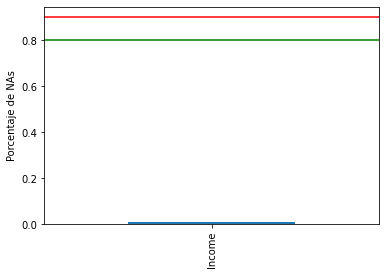

In [23]:
#graficamos porcentajes de NAs. Indicando la cantidad de data faltante de las variables
data[var_with_na].isnull().mean().sort_values(ascending=False).plot.bar()
plt.ylabel("Porcentaje de NAs")
plt.axhline(y=0.9, color="r")
plt.axhline(y=0.8, color="g")

In [24]:
#variables categóricas con NAs.
cat_na = [var for var in cat_vars if var in var_with_na]
cat_na

[]

In [25]:
#variables numéricas con NAs.
num_na = [var for var in num_vars if var in var_with_na]
num_na

['Income']

In [26]:
#mostrar la cantidad de variables con NA's tanto categóricas como numéricas
print("Cantidad de variables numéricas con NAs. {}".format(len(num_na)))
print("Cantidad de variables categóticas con NAs. {}".format(len(cat_na)))

Cantidad de variables numéricas con NAs. 1
Cantidad de variables categóticas con NAs. 0


#### 2.3.1 Verificación del impacto del NA contra el Target (Num Web Purchases)

In [27]:
def na_impact_over_target(df, Xvar, Yvar):
    df = data.copy()
    df[Xvar] = np.where(df[Xvar].isnull(), 1, 0)
    temp = df.groupby(Xvar)[Yvar].agg(['mean', 'std'])
    temp.plot(kind="barh", y="mean", xerr="std", legend=False, title=Yvar)
    plt.show()

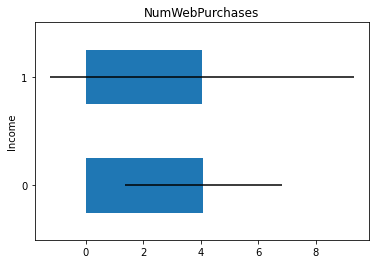

In [28]:
for var in var_with_na:
    na_impact_over_target(data, var, 'NumWebPurchases')

#### Llenar los NA's con los valores faltantes. Se utilizó la Media

In [29]:
#data['Income'].head()

In [30]:
#listaFun = []
#media = data['Income'].mean()
#data['Income'] = data['Income'].fillna(media)

In [31]:
#proporcion de NAs en cada variable
#data[var_with_na].isnull().mean().sort_values(ascending=False)

#### 2.4 Análisis de Variables Temporales

In [32]:
year_vars = [var for var in num_vars if (('Year' in var) or ('year' in var))]
year_vars

['Year_Birth', 'Year']

In [33]:
for var in year_vars:
    print(var, data[var].unique())
    print('\n')

Year_Birth [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]


Year [2012 2014 2013]




<AxesSubplot:xlabel='Year_Birth'>

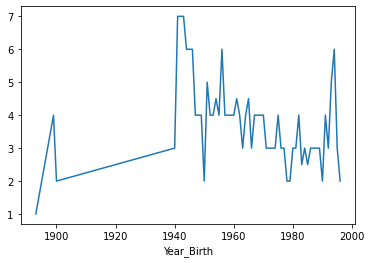

In [34]:
data.groupby('Year_Birth')['NumWebPurchases'].median().plot()

In [35]:
def plot_target_vrs_timeVar(df, Xvar, Yvar):
    df = df.copy()
    df.groupby(Xvar)[Yvar].median().plot()
    plt.show()

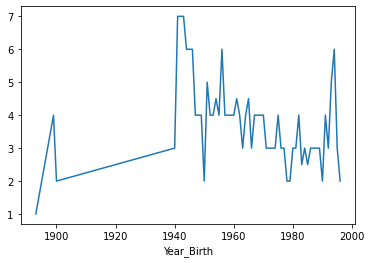

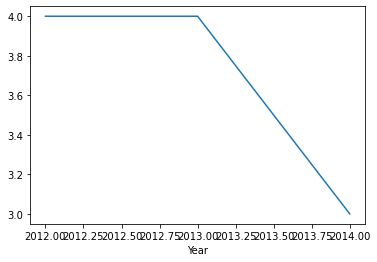

In [36]:
#verificamos del año sobre el precio.
for var in year_vars:
    plot_target_vrs_timeVar(data, var, 'NumWebPurchases')

In [37]:
def analyse_yearInscription_vrs_timeEvents(df, var, varRef):
    df = df.copy()
    df[var] = df[varRef] - df[var]
    df.groupby(varRef)[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()

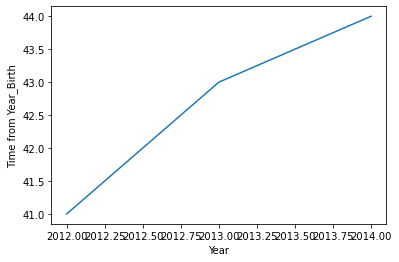

In [38]:
for var in year_vars:
    if(var != 'Year'):
        analyse_yearInscription_vrs_timeEvents(data, var, 'Year')

### 2.5 Variables Discretas

In [39]:
discrete_vars = [var for var in num_vars if((len(data[var].unique()) < 20) and (var not in year_vars))]
discrete_vars

['Kidhome',
 'Teenhome',
 'NumDealsPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'mes']

In [40]:
print("Cantidad de Variables Discretas: ", len(discrete_vars))

Cantidad de Variables Discretas:  16


In [41]:
data[discrete_vars].head()

,Kidhome,Teenhome,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,mes
0,0,0,3,10,4,7,0,0,0,0,0,0,3,11,1,9
1,1,1,2,1,2,5,0,0,0,0,0,0,3,11,0,3
2,0,0,1,2,10,4,0,0,0,0,0,0,3,11,0,8
3,1,0,2,0,4,6,0,0,0,0,0,0,3,11,0,2
4,1,0,5,3,6,5,0,0,0,0,0,0,3,11,0,1


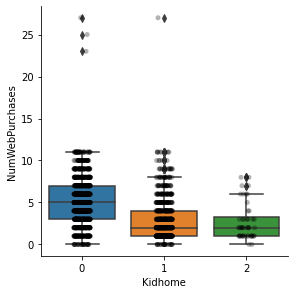

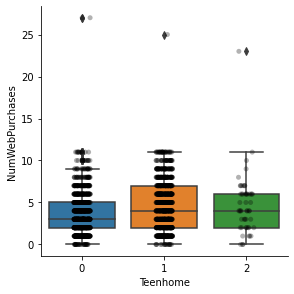

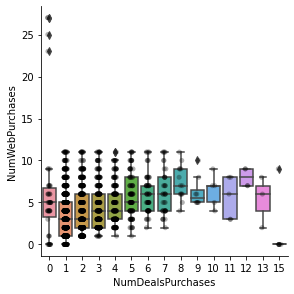

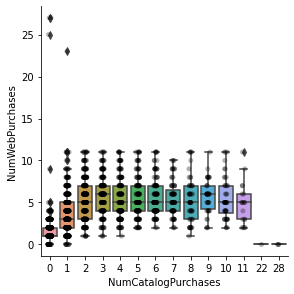

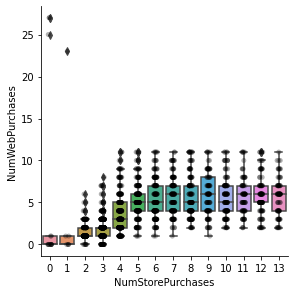

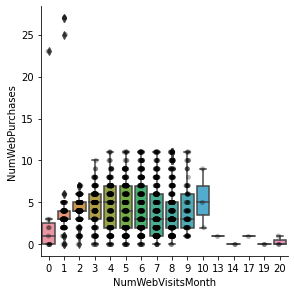

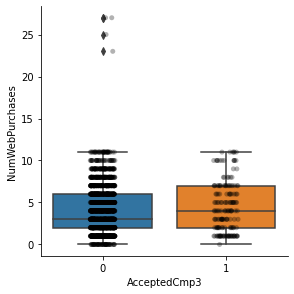

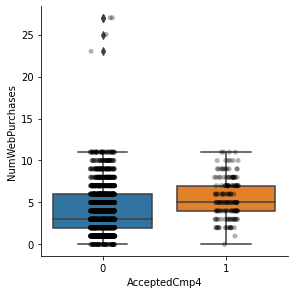

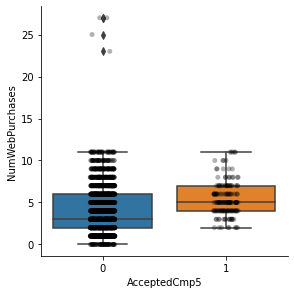

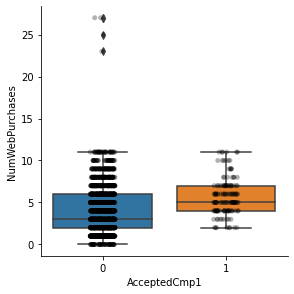

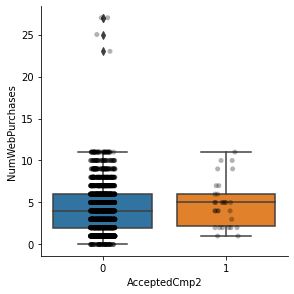

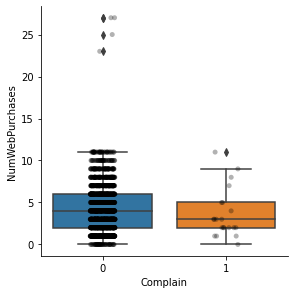

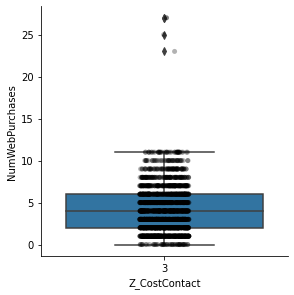

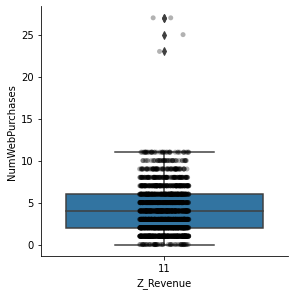

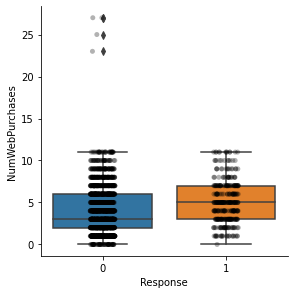

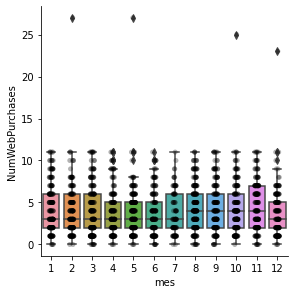

In [42]:
for var in discrete_vars:
    sns.catplot(x=var, y = 'NumWebPurchases', data=data, kind="box", height=4)
    sns.stripplot(x=var, y='NumWebPurchases', data=data, jitter=0.1, alpha=0.3,color='k')
    plt.show()

### 2.6 Variables Continuas

In [43]:
cont_vars = [var for var in num_vars if var not in discrete_vars + year_vars]

In [44]:
print("Variables Numericas Continuas: ", len(cont_vars))

Variables Numericas Continuas:  10


In [45]:
data[cont_vars].head()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,dia
0,5524,58138.0,58,635,88,546,172,88,88,4
1,2174,46344.0,38,11,1,6,2,1,6,8
2,4141,71613.0,26,426,49,127,111,21,42,21
3,6182,26646.0,26,11,4,20,10,3,5,10
4,5324,58293.0,94,173,43,118,46,27,15,19


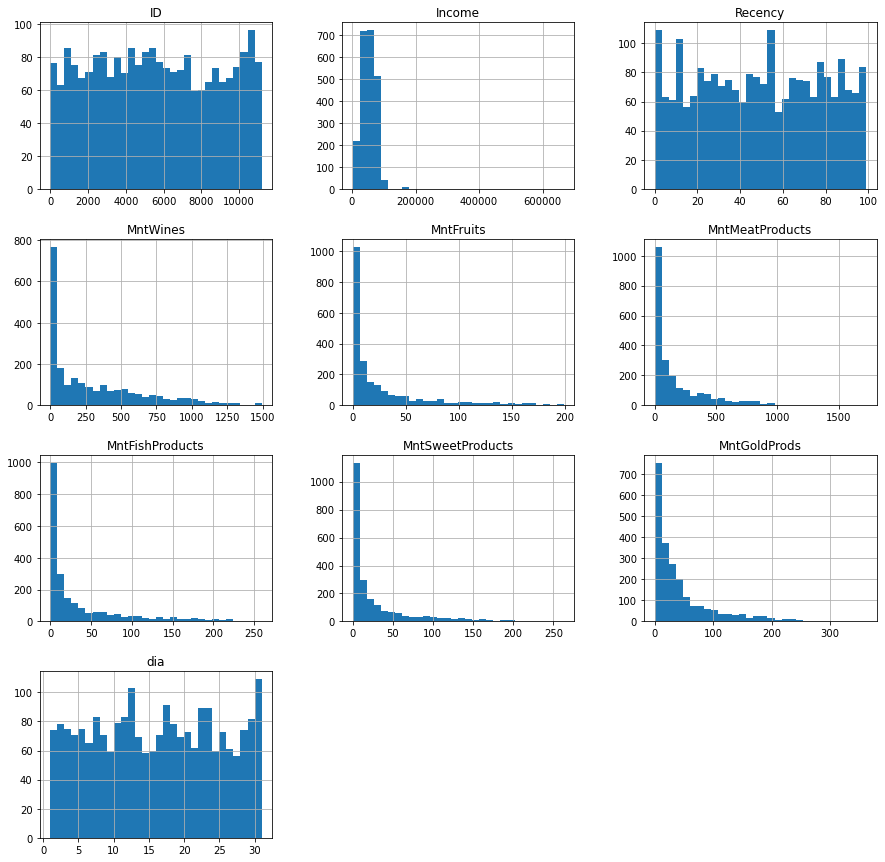

In [46]:
data[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

In [47]:
#se seleccionan las sesgadas
sesgadas = ['Income', 'MntFruits', 'MntSweetProducts', 'MntFishProducts', 'MntMeatProducts','MntWines','MntGoldProds']

In [48]:
cont_vars = [var for var in cont_vars if var not in sesgadas]

In [49]:
cont_vars

['ID', 'Recency', 'dia']

#### Transformación de Yeo-Johnson

In [50]:
temp_yj = data.copy()

In [51]:
for var in cont_vars:
    temp_yj[var], param = stats.yeojohnson(data[var])

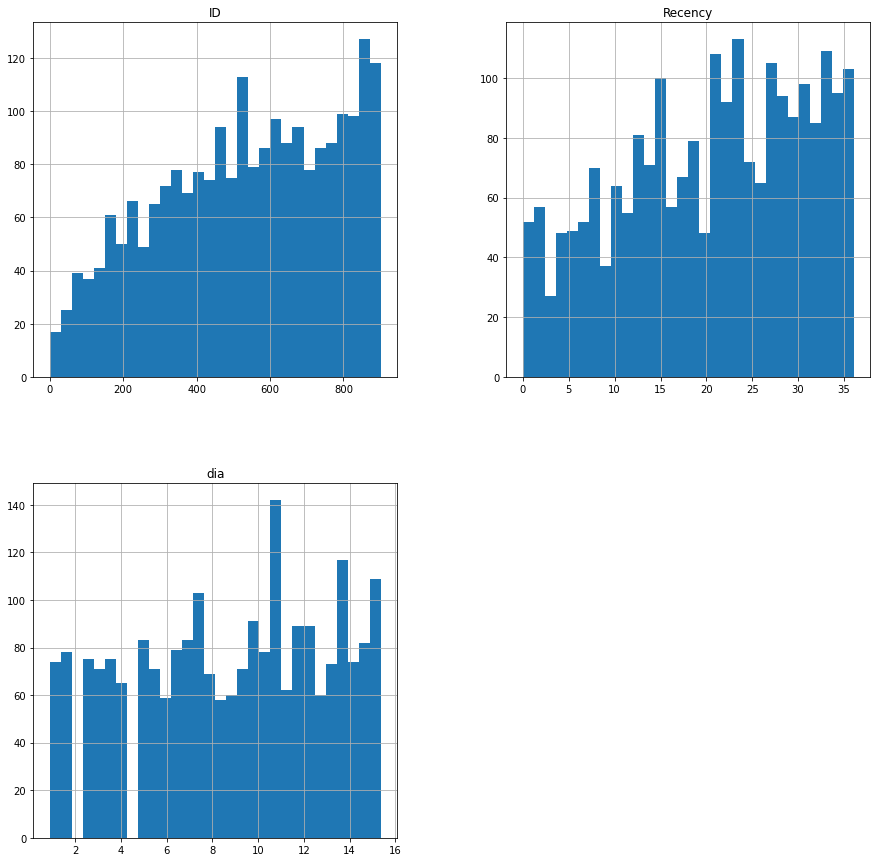

In [52]:
temp_yj[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

In [53]:
len(cont_vars)

3

In [54]:
#se seleccionan las sesgadas
#cont_specials = []

In [55]:
temp = data.copy()

for var in cont_vars:
    temp[var] = np.power(data[var],0.04)


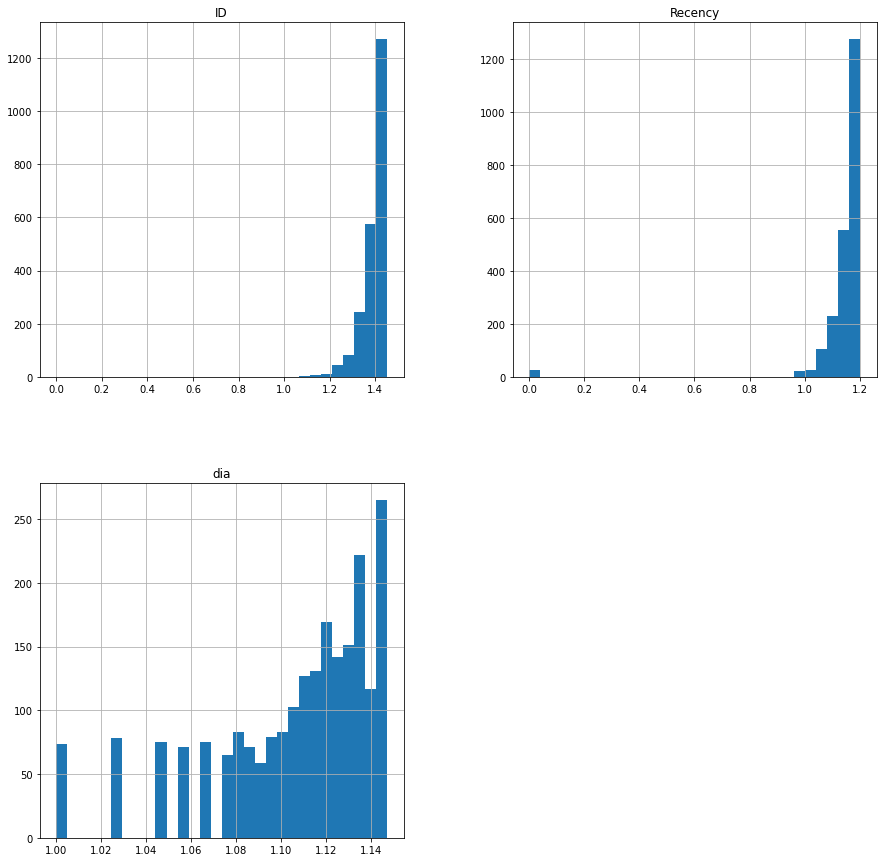

In [56]:
temp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

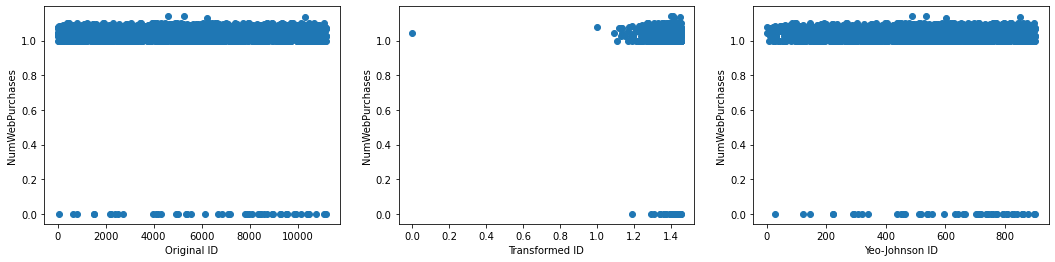

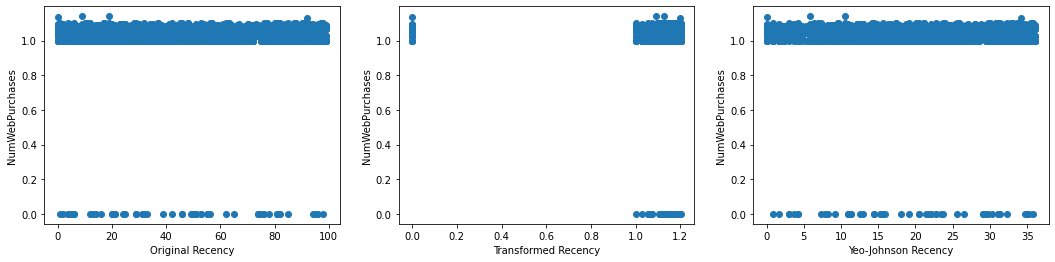

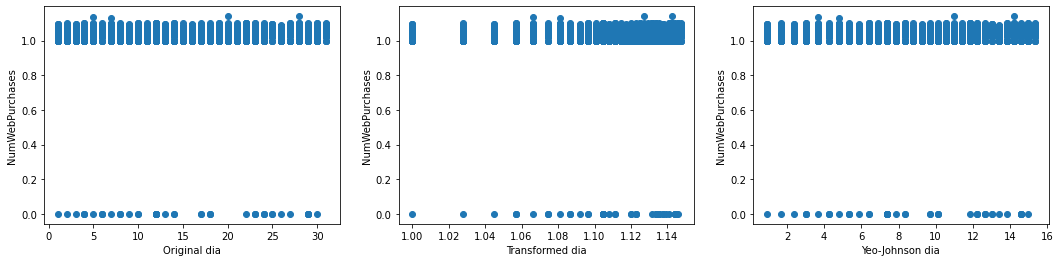

In [57]:
for var in cont_vars:
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 3, 1)
    plt.scatter(data[var], np.power(data['NumWebPurchases'],0.04))
    plt.ylabel("NumWebPurchases")
    plt.xlabel("Original " + var)
    
    plt.subplot(1, 3, 2)
    plt.scatter(temp[var], np.power(data['NumWebPurchases'],0.04))
    plt.ylabel("NumWebPurchases")
    plt.xlabel("Transformed " + var)
    
    plt.subplot(1, 3, 3)
    plt.scatter(temp_yj[var], np.power(data['NumWebPurchases'],0.04))
    plt.ylabel("NumWebPurchases")
    plt.xlabel("Yeo-Johnson " + var)

    plt.show()

### 2.6.1 Variables con Sesgo

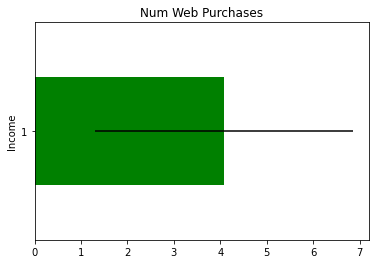

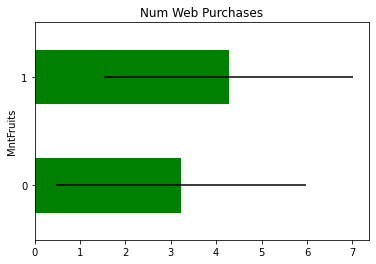

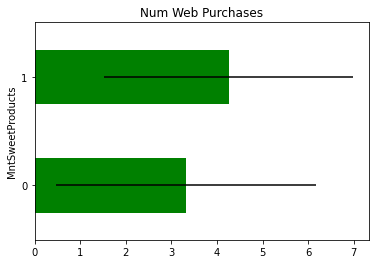

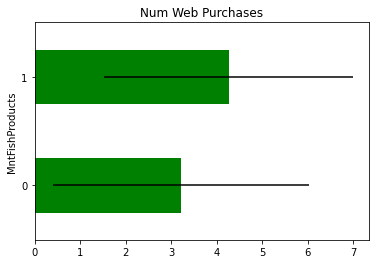

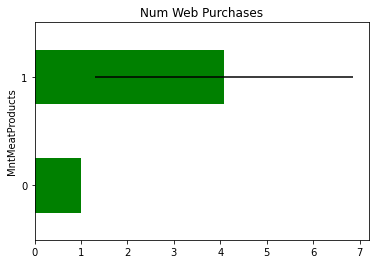

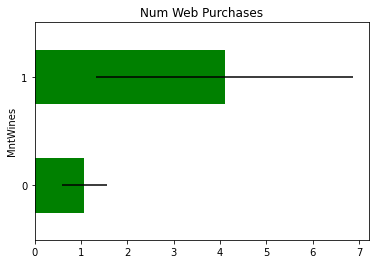

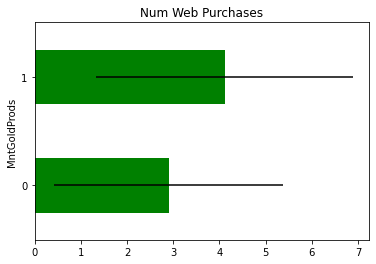

In [58]:
for var in sesgadas:
    temp = data.copy()
    
    temp[var] = np.where(data[var] == 0, 0, 1)
    
    temp = temp.groupby(var)['NumWebPurchases'].agg(['mean', 'std'])
    
    temp.plot(kind='barh', y="mean", legend=False, xerr="std", title = "Num Web Purchases", color="green")
    plt.show()

### 2.7 Variables Categóricas

In [59]:
len(cat_vars)

2

In [60]:
data[cat_vars].head()

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married


<AxesSubplot:>

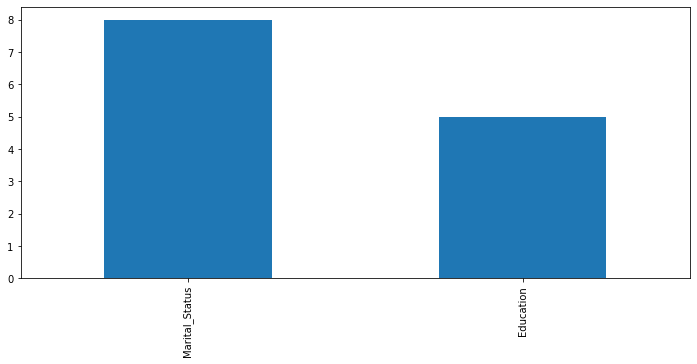

In [61]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

No se tienen variables que contengan las mismas opciones.

### 2.7 Rare Labels:

In [62]:
def analyse_rare_labels(df, var, rare_perc):
    temp = df.groupby(var)['NumWebPurchases'].count()/len(df)
    
    return temp[temp < rare_perc]

In [63]:
for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Series([], Name: NumWebPurchases, dtype: float64)

Marital_Status
Absurd    0.000893
Alone     0.001339
YOLO      0.000893
Name: NumWebPurchases, dtype: float64



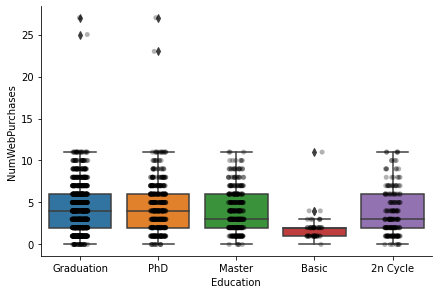

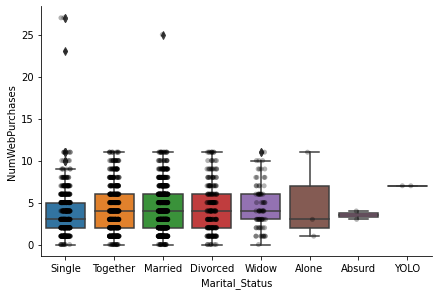

In [64]:
for var in cat_vars:
    sns.catplot(x=var, y = 'NumWebPurchases', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='NumWebPurchases', data=data, jitter=0.1, alpha=0.3,color='k')
    plt.show()

In [65]:
pd.pandas.set_option('display.max_columns', None) #habilitamos despliegue maximo de columnas

In [66]:
print(data.shape)

(2240, 31)


In [67]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [68]:
data['dia'], data['mes'], data['Year'] = data['Dt_Customer'].str.split('-', 2).str


<ipython-input-68-404d63822298>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['dia'], data['mes'], data['Year'] = data['Dt_Customer'].str.split('-', 2).str


In [69]:
data["dia"] = pd.to_numeric(data["dia"])
data["mes"] = pd.to_numeric(data["mes"])
data["Year"] = pd.to_numeric(data["Year"])



In [70]:
del(data['Dt_Customer'])


In [71]:
data.shape

(2240, 31)

In [72]:
#separamos data para entrenamiento y prueba,
X_train, X_test, y_train, y_test = train_test_split(
                        data.drop(['NumWebPurchases'], axis=1),
                        data['NumWebPurchases'],
                        test_size=0.20,
                        random_state=2021)

In [73]:
X_train.shape, X_test.shape

((1792, 30), (448, 30))

### 1. Transformación del Target a Gausssiano

In [74]:
#y_train = np.power(y_train,0.04)
#y_test = np.power(y_test,0.04)

### 2. Missing Values

##### 2.1 Missing Values para Variables Categóricas

In [75]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars

['Education', 'Marital_Status']

In [76]:
X_train[cat_vars] = X_train[cat_vars].astype('O')
X_test[cat_vars] = X_test[cat_vars].astype('O')

In [77]:
len(cat_vars)

2

##### 2.1.1 Detección de NaN en variables categórias

In [78]:
cat_vars_with_na = [var for var in cat_vars 
                        if X_train[var].isnull().sum() > 0]

In [79]:
cat_vars_with_na

[]

In [80]:
X_train[cat_vars_with_na].isnull().mean().sort_values(ascending = False)

Series([], dtype: float64)

##### 2.2 Missing Values para Variables Numéricas

In [81]:
num_vars = [var for var in X_train.columns
               if var not in cat_vars and var != 'NumWebPurchases']

In [82]:
len(num_vars)

28

In [83]:
##Numéricas con faltantes
num_vars_with_na = [var for var in num_vars
                       if X_train[var].isnull().sum() > 0]



In [84]:
X_train[num_vars_with_na].isnull().mean()

Income    0.010603
dtype: float64

Anteriormente, se utilizó la media para llenar los faltantes, pero se realiza ya con la data del train y test separado.

##### Aplicamos criterio para tratar data faltante

In [85]:
for var in num_vars_with_na:
    mean_val = X_train[var].mean()
    
    print(var, mean_val)
    
    X_train[var].fillna(mean_val, inplace=True)
    X_test[var].fillna(mean_val, inplace=True)
    

Income 52293.73716864072


In [86]:
X_train[num_vars_with_na].isnull().mean()

Income    0.0
dtype: float64

### 3. Variables Temporales

In [87]:
def elapsed_time(df, var, ref):
    df[var] = df[ref] - df[var]
    return df

In [88]:
year_vars = [var for var in num_vars if (('Yr' in var) or ('Year' in var))]
year_vars

['Year_Birth', 'Year']

In [89]:
ref = 'Year'

for var in year_vars:
    if(var is not ref):
        X_train = elapsed_time(X_train, var, ref)
        X_test = elapsed_time(X_test, var, ref)

In [90]:
#Se elimina la columna Year debido a que guardará el valor 0
X_train.drop(['Year'], axis=1, inplace=True)
X_test.drop(['Year'], axis=1, inplace=True)

### 4. Transformación de Variables Numéricas

No se aplica transformación np.power para ninguna variable ya que en el resultado anterior, no mejoraba los datos.
Se mejorarán normalmente como estaban o bien con Yeo Jonhson

In [91]:
#Se aplica la transformación de Yeo-Jonhson para las siguientes variables
X_train['ID'], param = stats.yeojohnson(X_train['ID'])
X_test['ID'] = stats.yeojohnson(X_test['ID'], lmbda=param)

In [92]:
print(param)

0.7106425366613692


In [93]:
X_train['Recency'], param = stats.yeojohnson(X_train['Recency'])
X_test['Recency'] = stats.yeojohnson(X_test['Recency'], lmbda=param)

In [94]:
print(param)

0.7217916877099962


In [95]:
X_train['dia'], param = stats.yeojohnson(X_train['dia'])
X_test['dia'] = stats.yeojohnson(X_test['dia'], lmbda=param)

In [96]:
print(param)

0.7152184927785726


#### 4.1 Binarización de Variables con Sesgo fuerte

In [97]:
sesgadas = ['MntFruits', 'MntSweetProducts', 'MntFishProducts', 'MntMeatProducts','MntWines','MntGoldProds']

In [98]:
for var in sesgadas:
    X_train[var] = np.where(X_train[var] == 0, 0, 1)
    X_test[var] = np.where(X_test[var] == 0, 0, 1)

#### 5. Codificación de Variables Categóricas
No se tienen variables que compartan opciones, por lo que no aplica.

#### 5.1 Codificación de Raras (baja frecuencia)

In [99]:
#tomar las variables que son categoricas
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars

['Education', 'Marital_Status']

In [100]:
len(cat_vars)

2

In [101]:
#funcion para encontar etiquetas raras
def find_rare_labels_freq(df, var, rare_perc):
    temp = df.groupby(var)[var].count()/len(df)
    return temp[temp > rare_perc].index

In [102]:
for var in cat_vars:
    freqValue = find_rare_labels_freq(X_train, var, 0.01)
  
    X_train[var] = np.where(X_train[var].isin(freqValue), X_train[var], 'Rare')
    X_test[var] = np.where(X_test[var].isin(freqValue), X_test[var], 'Rare')

In [103]:
def replace_category_vals(train, test, y_train, var, target):
    
    temp = pd.concat([train, y_train], axis=1) 
    order_labels = temp.groupby([var])[target].mean().sort_values().index
    
    ordinal_values = {k: i for i, k in enumerate(order_labels, 0)}
    
    print(var, ordinal_values)
    
    train[var] = train[var].map(ordinal_values)
    test[var] = test[var].map(ordinal_values)

In [104]:
for var in cat_vars:
    replace_category_vals(X_train, X_test, y_train, var, 'NumWebPurchases')

Education {'Basic': 0, '2n Cycle': 1, 'Master': 2, 'Graduation': 3, 'PhD': 4}
Marital_Status {'Single': 0, 'Together': 1, 'Married': 2, 'Divorced': 3, 'Widow': 4, 'Rare': 5}


In [105]:
def analyse_other_cats(train, y_train, var):
    temp = pd.concat([train, y_train], axis=1)

    temp.groupby(var)['NumWebPurchases'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Num Web Purchases')
    plt.show()

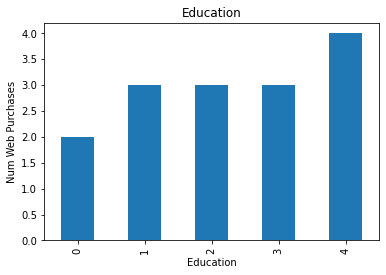

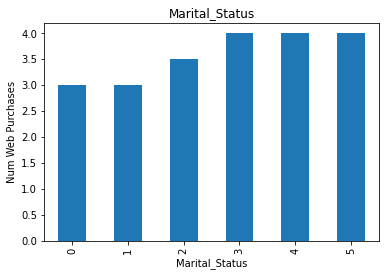

In [106]:
for var in cat_vars:
    analyse_other_cats(X_train, y_train, var)

### 6. Feature Scaling

In [107]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)


X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

In [108]:
X_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dia,mes
0,0.284869,0.238095,0.75,0.4,0.058037,0.5,0.5,0.680107,1.0,1.0,1.0,1.0,0.0,1.0,0.133333,0.000000,0.230769,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.947689,0.545455
1,0.692502,0.085714,0.75,0.2,0.045415,0.5,0.0,0.098792,1.0,1.0,1.0,1.0,1.0,1.0,0.133333,0.000000,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.921163,0.181818
2,0.842721,0.123810,1.00,0.4,0.054810,0.5,0.0,0.114815,1.0,1.0,1.0,1.0,1.0,1.0,0.200000,0.035714,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.784346,0.727273
3,0.713414,0.485714,0.75,0.0,0.113886,0.0,0.0,0.893001,1.0,1.0,1.0,1.0,1.0,1.0,0.066667,0.178571,0.769231,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190604,0.181818
4,0.328546,0.142857,1.00,0.2,0.102729,0.0,0.0,0.636433,1.0,1.0,1.0,1.0,1.0,1.0,0.066667,0.142857,0.615385,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.839964,0.818182


In [109]:
X_train.shape

(1792, 29)

In [110]:
X_test.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dia,mes
0,0.471020,0.247619,0.75,0.0,0.038368,0.5,0.0,0.045197,1.0,1.0,1.0,1.0,1.0,1.0,0.133333,0.000000,0.230769,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.415359,0.909091
1,0.665113,0.180952,0.75,0.4,0.047086,0.5,0.0,0.082004,1.0,1.0,1.0,1.0,1.0,1.0,0.066667,0.000000,0.307692,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.345063,0.727273
2,0.259523,0.285714,1.00,0.2,0.092116,0.0,0.0,0.310416,1.0,1.0,1.0,1.0,1.0,0.0,0.066667,0.178571,1.000000,0.15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.608797,0.181818
3,0.969289,0.495238,0.75,0.4,0.102303,0.0,0.0,0.332958,1.0,1.0,1.0,1.0,1.0,1.0,0.066667,0.214286,0.923077,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053703,0.818182
4,0.754512,0.314286,0.75,0.4,0.071234,0.5,0.5,0.239001,1.0,1.0,1.0,1.0,1.0,1.0,0.266667,0.035714,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.812313,0.727273


In [111]:
y_train.head()

1318    3
1540    3
1705    3
307     2
2062    4
Name: NumWebPurchases, dtype: int64

In [112]:
y_test.head()

1519    2
1517    2
135     4
1637    3
106     4
Name: NumWebPurchases, dtype: int64

In [113]:
#Guardamos dataset con data preparada para entrenamiento.

X_train.to_csv('preprocess_data/prep_Xtrain.csv', index=False)
X_test.to_csv('preprocess_data/prep_Xtest.csv', index=False)

y_train.to_csv('preprocess_data/prep_ytrain.csv', index=False)
y_test.to_csv('preprocess_data/prep_ytest.csv', index=False)

In [114]:
joblib.dump(scaler, 'preprocess_data/minmax_scaler.joblib')

['preprocess_data/minmax_scaler.joblib']

In [115]:
np.sum(X_train[X_train == 'Unf'].sum(axis=0))

0.0